In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
empty =  pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Empty_Chicago_Matrix.csv', index_col = 0)

In [ ]:
len(empty)

In [ ]:
empty = empty.groupby(by =['YEAR','MONTH','TOD','DESTINATION'], as_index = False).first()

In [ ]:
empty = empty.drop('ORIGIN', axis = 1)

In [ ]:
df2 = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Sample.csv', index_col = 0)

In [ ]:
empty['AIR_F'] = np.where((empty['DESTINATION'].isin([17031980000,17031980100])),1,0)

In [ ]:
df2['TOD_1'] = np.where( (df2['HOUR'] <  6)|(df2['HOUR'] >= 22), 1,0)
df2['TOD'] = np.where( (df2['HOUR'] <  6)|(df2['HOUR'] >= 22), 1,0)

df2['TOD_2'] = np.where( (df2['HOUR'] <  9)&(df2['HOUR'] >= 6), 1,0)
df2['TOD'] = np.where( (df2['HOUR'] <  9)&(df2['HOUR'] >= 6), 2,df2['TOD'])

df2['TOD_3'] = np.where( (df2['HOUR'] <  16)&(df2['HOUR'] >= 9), 1,0)
df2['TOD'] = np.where( (df2['HOUR'] <  16)&(df2['HOUR'] >= 9), 3,df2['TOD'])

df2['TOD_4'] = np.where( (df2['HOUR'] <  19)&(df2['HOUR'] >= 16), 1,0)
df2['TOD'] = np.where( (df2['HOUR'] <  19)&(df2['HOUR'] >= 16), 4,df2['TOD'])

df2['TOD_5'] = np.where( (df2['HOUR'] <  22)&(df2['HOUR'] >= 19), 1,0)
df2['TOD'] = np.where( (df2['HOUR'] <  22)&(df2['HOUR'] >= 19), 5,df2['TOD'])


In [ ]:
df2.TOD.unique()

In [10]:
df2['DROPOFFS'] = 1
df2['SHARED_DROPOFFS'] = np.where(df2['SHARED_FLAGGER'] == 1,1,0)
df2['PRIVATE_DROPOFFS'] = np.where(df2['SHARED_FLAGGER'] == 0,1,0)

In [11]:
drop = ['HOUR','ORIGIN_COM_AREA','DEST_COM_AREA','ORIGIN','TOD_1',
'TOD_2',
'TOD_3',
'TOD_4',
'TOD_5',
'SHARED_FLAGGER','TRIP_ID','TRIP_START_TIME','TRIP_END_TIME','INTERNAL_UNSUPPRESSED_FLAGGER','INTERNAL_SUPPPRESSED_FLAGGER','EXTERNAL_FLAGGER','INTERNAL_EXTERNAL_FLAGGER','TRIP_TYPE']

In [12]:
df2 = df2.drop(drop, axis = 1)

In [13]:
agg = {'DROPOFFS':'sum','PRIVATE_DROPOFFS':'sum','SHARED_DROPOFFS':'sum',
'TRAVEL_TIME_MINUTES':'mean',
'TRIP_LENGTH_MILES':'mean',
'FARE':'mean',
'TIP':'mean',
'ADDITIONAL_CHARGES':'mean',
'TOTAL_COST':'mean',
'NUM_TRIPS_POOLED':'sum',
'SPEED':'mean'}

In [ ]:
df2 = df2.groupby(by =['YEAR','MONTH','TOD','DESTINATION'], as_index = False).agg(agg)

In [16]:
wd = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Number of Weekdays.csv')

In [17]:
df2 = df2.merge(wd, on = ['YEAR','MONTH'])

In [19]:
df2['DROPOFFS_AVG'] = df2['DROPOFFS']/df2['WEEKDAYS']

In [ ]:
df2['DROPOFFS_AVG'].mean()

In [22]:
df2['DROPOFFS_AVG'].max()

72.55

In [23]:
df2['DROPOFFS_AVG'].min()

0.043478260869565216

In [24]:
df2.TOD.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [25]:
df2['DROPOFFS_AVG'].mean()

0.8308167316281229

In [26]:
df2['DROPOFFS_AVG'].max()

72.55

In [27]:
df2['DROPOFFS_AVG'].min()

0.043478260869565216

In [28]:
len(empty)

64080

In [29]:
df2 = empty.merge(df2, how ='left',on = ['DESTINATION','MONTH','YEAR','TOD'])

In [30]:
len(df2)

64080

In [31]:
df2['DROPOFFS_AVG'] = df2['DROPOFFS_AVG'].fillna(0)

In [32]:
acs = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Chicago_ACS_Data.csv')

In [33]:
acs['HHLDS_LESS_35K'] = acs['TOTAL_HHLDS_LESS_10K'] + acs['TOTAL_HHLDS_10K_15K'] + acs['TOTAL_HHLDS_15K_25K'] + acs['TOTAL_HHLDS_25K_35K']
acs['HHLDS_35K_150K'] = acs['TOTAL_HHLDS_35K_50K'] + acs['TOTAL_HHLDS_50K_75K'] + acs['TOTAL_HHLDS_75K_100K'] + acs['TOTAL_HHLDS_100K_150K']
acs['HHLDS_MORE_150K'] =  acs['TOTAL_HHLDS_150K_200K'] + acs['TOTAL_HHLDS_200KP']

In [34]:
acs['T20_35'] = acs['AGE_20_24'] + acs['AGE_25_34']
acs['T35_65'] = acs['AGE_35_44'] + acs['AGE_45_54'] + acs['AGE_55_59'] + acs['AGE_60_64']
acs['T65P'] = acs['AGE_65_74'] + acs['AGE_75_84'] + acs['AGE_85P']


acs['PER_20_35'] = (acs['T20_35']/acs['TOTAL_POP'])*100
acs['PER_35_65'] = (acs['T35_65']/acs['TOTAL_POP'])*100
acs['PER_65P'] = (acs['T65P']/acs['TOTAL_POP'])*100

In [35]:
acs['P_BACH_25P'] = (acs['TOTAL_POP_25P_BACHELORS_HIGHER']/acs['TOTAL_POP'])*100

In [36]:
acs2 = acs[['PER_20_35','P_BACH_25P','PER_35_65','PER_65P','YEAR','MONTH','TOD','CENSUS_TRACT','TOTAL_POP','TOTAL_HHLDS','AVG_HHLD_SIZE','HHLDS_MEAN_INCOME','HHLDS_LESS_35K','HHLDS_35K_150K','HHLDS_MORE_150K','HHLDS_0_VEH','AVG_VEH_PER_HHLD','HHLDS_MEDIAN_INCOME','TOTAL_POP_25P_BACHELORS_HIGHER','TOTAL_MALE', 'TOTAL_FEMALE','MEDIAN_AGE']]

In [37]:
acs2.head()

,PER_20_35,P_BACH_25P,PER_35_65,PER_65P,YEAR,MONTH,TOD,CENSUS_TRACT,TOTAL_POP,TOTAL_HHLDS,...,HHLDS_LESS_35K,HHLDS_35K_150K,HHLDS_MORE_150K,HHLDS_0_VEH,AVG_VEH_PER_HHLD,HHLDS_MEDIAN_INCOME,TOTAL_POP_25P_BACHELORS_HIGHER,TOTAL_MALE,TOTAL_FEMALE,MEDIAN_AGE
0,28.217603,32.795223,45.687749,5.572755,2018,11,1,17031010100,4522.0,2316.0,...,48.8,45.0,6.3,1162.0,0.665803,37985.0,1483.0,2301.0,2221.0,35.3
1,21.082540,21.380878,45.389970,6.591845,2018,11,1,17031010201,7039.0,2688.0,...,47.8,49.4,2.8,751.0,0.988095,39549.0,1505.0,3701.0,3338.0,36.3
2,24.684432,23.457223,38.639551,13.394109,2018,11,1,17031010202,2852.0,1102.0,...,46.3,50.0,3.6,464.0,0.768603,38370.0,669.0,1390.0,1462.0,35.7
3,20.571429,30.977444,43.984962,18.751880,2018,11,1,17031010300,6650.0,3037.0,...,44.3,47.0,8.6,993.0,0.932170,38866.0,2060.0,3294.0,3356.0,41.6
4,33.883175,33.087522,27.634388,6.617504,2018,11,1,17031010400,5153.0,1938.0,...,41.5,53.2,5.2,655.0,0.762126,39152.0,1705.0,2405.0,2748.0,25.2


In [38]:
lehd = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/CHI_WAC.csv',index_col = 0)

In [39]:
lehd['TOTAL_EMP'] = lehd['CNS01'] + lehd['CNS02'] + lehd['CNS03'] + lehd['CNS04'] + lehd['CNS05'] + lehd['CNS06'] + lehd['CNS07'] + lehd['CNS08'] + lehd['CNS09'] + lehd['CNS10'] + lehd['CNS11'] + lehd['CNS12'] + lehd['CNS13'] + lehd['CNS14'] + lehd['CNS15'] + lehd['CNS16'] + lehd['CNS17'] + lehd['CNS18'] + lehd['CNS19'] + lehd['CNS20']

In [40]:
lehd['OTHER_EMP'] = lehd['CNS01'] + lehd['CNS02'] + lehd['CNS03'] + lehd['CNS04'] + lehd['CNS05'] + lehd['CNS06'] + lehd['CNS08'] + lehd['CNS09'] + lehd['CNS10'] + lehd['CNS11'] + lehd['CNS12'] + lehd['CNS13'] + lehd['CNS14'] + lehd['CNS15'] + lehd['CNS16'] + lehd['CNS17'] + lehd['CNS19'] + lehd['CNS20']

In [41]:
lehd['RETAIL_EMP'] = lehd['CNS07']

In [42]:
lehd['FOOD_EMP'] = lehd['CNS18']

In [43]:
lehd['PER_RETAIL'] = lehd['RETAIL_EMP']/lehd['TOTAL_EMP']
lehd['PER_FOOD'] = lehd['FOOD_EMP']/lehd['TOTAL_EMP']
lehd['PER_OTHER'] = lehd['OTHER_EMP']/lehd['TOTAL_EMP']

In [44]:
access = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Accessibility_Variables.csv',index_col = 0)

In [45]:
access['DESTINATION'] = access['ORIGIN']

In [46]:
df2 = df2.merge(access, on = ['DESTINATION','MONTH','YEAR','TOD'], how = 'left')

In [47]:
df2['TRACTCE10'] = df2.DESTINATION.astype(str)
df2['TRACTCE10'] = df2['TRACTCE10'].apply(lambda x : x[5:11])
df2['TRACTCE10'] = df2['TRACTCE10'].astype(int)

In [48]:
df2.TOD

0        1
1        1
2        1
3        1
4        1
        ..
64075    5
64076    5
64077    5
64078    5
64079    5
Name: TOD, Length: 64080, dtype: int64

In [49]:
df2 = df2.merge(lehd[['PER_OTHER','PER_FOOD','PER_RETAIL','TOTAL_EMP','RETAIL_EMP','OTHER_EMP','FOOD_EMP','TRACTCE10','MONTH','YEAR']], how = 'left', on = ['TRACTCE10','MONTH','YEAR'])

In [50]:
df2 = df2.merge(acs2, how = 'left', left_on = ['DESTINATION','MONTH','YEAR','TOD'], right_on = ['CENSUS_TRACT','MONTH','YEAR','TOD'])

In [51]:
transit_access = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Transit_Accessibility_Variables.csv', index_col = 0)

In [52]:
transit_access['DESTINATION'] = transit_access['ORIGIN']

In [53]:
all_access = access.merge(transit_access, on = ['DESTINATION','MONTH','YEAR','TOD'], how = 'right', suffixes = ('_AUTO','_TRANSIT'))

In [54]:
log_sum = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_LOGSUM.csv', index_col = 0)

In [55]:
log_sum.head()

,ORIGIN,MONTH,YEAR,TOD,LOGSUM
0,1.703101e+10,11.0,2018.0,1.0,3.654643
1,1.703101e+10,11.0,2018.0,1.0,3.870129
2,1.703101e+10,11.0,2018.0,1.0,3.849336
3,1.703101e+10,11.0,2018.0,1.0,3.745827
4,1.703101e+10,11.0,2018.0,1.0,3.954551


In [56]:
log_sum['DESTINATION'] = log_sum['ORIGIN']

In [57]:
df2 = df2.merge(log_sum, on = ['DESTINATION','MONTH','YEAR','TOD'], how = 'left')

In [58]:
df2.head()

,YEAR,MONTH,TOD,DESTINATION,AIR_F,DROPOFFS,PRIVATE_DROPOFFS,SHARED_DROPOFFS,TRAVEL_TIME_MINUTES,TRIP_LENGTH_MILES,...,HHLDS_MORE_150K,HHLDS_0_VEH,AVG_VEH_PER_HHLD,HHLDS_MEDIAN_INCOME,TOTAL_POP_25P_BACHELORS_HIGHER,TOTAL_MALE,TOTAL_FEMALE,MEDIAN_AGE,ORIGIN_y,LOGSUM
0,2018,11,1,17031010100,0,17.0,12.0,5.0,17.791176,7.505882,...,6.3,1162.0,0.665803,37985.0,1483.0,2301.0,2221.0,35.3,1.703101e+10,3.654643
1,2018,11,1,17031010201,0,14.0,7.0,7.0,15.391667,6.021429,...,2.8,751.0,0.988095,39549.0,1505.0,3701.0,3338.0,36.3,1.703101e+10,3.870129
2,2018,11,1,17031010202,0,7.0,3.0,4.0,15.019048,5.014286,...,3.6,464.0,0.768603,38370.0,669.0,1390.0,1462.0,35.7,1.703101e+10,3.849336
3,2018,11,1,17031010300,0,25.0,14.0,11.0,16.430667,6.728000,...,8.6,993.0,0.932170,38866.0,2060.0,3294.0,3356.0,41.6,1.703101e+10,3.745827
4,2018,11,1,17031010400,0,19.0,13.0,6.0,18.312281,7.484211,...,5.2,655.0,0.762126,39152.0,1705.0,2405.0,2748.0,25.2,1.703101e+10,3.954551


In [59]:
vars = ['TOTAL_EMP','RETAIL_EMP','OTHER_EMP','FOOD_SERVICES_EMP','TOTAL_POP','TOTAL_HHLDS','TOTAL_HHLDS_MORE_150K']

In [60]:
#for var in vars:
 #   print('Working on variable ' + var)
  #  all_access[var + '_WITHIN_5_TRANSIT_AUTO_DIFF'] = all_access[var + '_WITHIN_5_TRANSIT'] - all_access[var + '_WITHIN_5_AUTO']
   # all_access[var + '_WITHIN_15_TRANSIT_AUTO_DIFF'] = all_access[var + '_WITHIN_15_TRANSIT'] - all_access[var + '_WITHIN_15_AUTO']
    #all_access[var + '_WITHIN_30_TRANSIT_AUTO_DIFF'] = all_access[var + '_WITHIN_30_TRANSIT'] - all_access[var + '_WITHIN_30_AUTO']
    #all_access[var + '_WITHIN_45_TRANSIT_AUTO_DIFF'] = all_access[var + '_WITHIN_45_TRANSIT'] - all_access[var + '_WITHIN_45_AUTO']
    #all_access[var + '_WITHIN_60_TRANSIT_AUTO_DIFF'] = all_access[var + '_WITHIN_60_TRANSIT'] - all_access[var + '_WITHIN_60_AUTO']

In [61]:
drop = [ 'TOTAL_POP_WITHIN_5_AUTO',
       'TOTAL_POP_WITHIN_15_AUTO', 'TOTAL_POP_WITHIN_30_AUTO',
       'TOTAL_POP_WITHIN_45_AUTO', 'TOTAL_POP_WITHIN_60_AUTO',
       'TOTAL_HHLDS_MORE_150K_WITHIN_60_AUTO',
       'TOTAL_HHLDS_MORE_150K_WITHIN_45_AUTO',
       'TOTAL_HHLDS_MORE_150K_WITHIN_30_AUTO',
       'TOTAL_HHLDS_MORE_150K_WITHIN_15_AUTO',
       'TOTAL_HHLDS_MORE_150K_WITHIN_5_AUTO', 'TOTAL_HHLDS_WITHIN_60_AUTO',
       'TOTAL_HHLDS_WITHIN_45_AUTO', 'TOTAL_HHLDS_WITHIN_30_AUTO',
       'TOTAL_HHLDS_WITHIN_15_AUTO', 'TOTAL_HHLDS_WITHIN_5_AUTO',
       'FOOD_SERVICES_EMP_WITHIN_60_AUTO', 'FOOD_SERVICES_EMP_WITHIN_45_AUTO',
       'FOOD_SERVICES_EMP_WITHIN_30_AUTO', 'FOOD_SERVICES_EMP_WITHIN_15_AUTO',
       'FOOD_SERVICES_EMP_WITHIN_5_AUTO', 'OTHER_EMP_WITHIN_60_AUTO',
       'OTHER_EMP_WITHIN_45_AUTO', 'OTHER_EMP_WITHIN_30_AUTO',
       'OTHER_EMP_WITHIN_15_AUTO', 'OTHER_EMP_WITHIN_5_AUTO',
       'RETAIL_EMP_WITHIN_60_AUTO', 'RETAIL_EMP_WITHIN_45_AUTO',
       'RETAIL_EMP_WITHIN_30_AUTO', 'RETAIL_EMP_WITHIN_15_AUTO',
       'RETAIL_EMP_WITHIN_5_AUTO', 'TOTAL_EMP_WITHIN_60_AUTO',
       'TOTAL_EMP_WITHIN_45_AUTO', 'TOTAL_EMP_WITHIN_30_AUTO',
       'TOTAL_EMP_WITHIN_15_AUTO', 'TOTAL_EMP_WITHIN_5_AUTO',
        'TOTAL_POP_WITHIN_5_TRANSIT',
       'TOTAL_POP_WITHIN_15_TRANSIT', 'TOTAL_POP_WITHIN_30_TRANSIT',
       'TOTAL_POP_WITHIN_45_TRANSIT', 'TOTAL_POP_WITHIN_60_TRANSIT',
       'TOTAL_HHLDS_MORE_150K_WITHIN_60_TRANSIT',
       'TOTAL_HHLDS_MORE_150K_WITHIN_45_TRANSIT',
       'TOTAL_HHLDS_MORE_150K_WITHIN_30_TRANSIT',
       'TOTAL_HHLDS_MORE_150K_WITHIN_15_TRANSIT',
       'TOTAL_HHLDS_MORE_150K_WITHIN_5_TRANSIT',
       'TOTAL_HHLDS_WITHIN_60_TRANSIT', 'TOTAL_HHLDS_WITHIN_45_TRANSIT',
       'TOTAL_HHLDS_WITHIN_30_TRANSIT', 'TOTAL_HHLDS_WITHIN_15_TRANSIT',
       'TOTAL_HHLDS_WITHIN_5_TRANSIT', 'FOOD_SERVICES_EMP_WITHIN_60_TRANSIT',
       'FOOD_SERVICES_EMP_WITHIN_45_TRANSIT',
       'FOOD_SERVICES_EMP_WITHIN_30_TRANSIT',
       'FOOD_SERVICES_EMP_WITHIN_15_TRANSIT',
       'FOOD_SERVICES_EMP_WITHIN_5_TRANSIT', 'OTHER_EMP_WITHIN_60_TRANSIT',
       'OTHER_EMP_WITHIN_45_TRANSIT', 'OTHER_EMP_WITHIN_30_TRANSIT',
       'OTHER_EMP_WITHIN_15_TRANSIT', 'OTHER_EMP_WITHIN_5_TRANSIT',
       'RETAIL_EMP_WITHIN_60_TRANSIT', 'RETAIL_EMP_WITHIN_45_TRANSIT',
       'RETAIL_EMP_WITHIN_30_TRANSIT', 'RETAIL_EMP_WITHIN_15_TRANSIT',
       'RETAIL_EMP_WITHIN_5_TRANSIT', 'TOTAL_EMP_WITHIN_60_TRANSIT',
       'TOTAL_EMP_WITHIN_45_TRANSIT', 'TOTAL_EMP_WITHIN_30_TRANSIT',
       'TOTAL_EMP_WITHIN_15_TRANSIT', 'TOTAL_EMP_WITHIN_5_TRANSIT']

In [62]:
#all_access = all_access.drop(drop, axis = 1)

In [63]:
all_access.head()

,ORIGIN_AUTO,MONTH,YEAR,TOD,TOTAL_POP_WITHIN_5_AUTO,TOTAL_POP_WITHIN_15_AUTO,TOTAL_POP_WITHIN_30_AUTO,TOTAL_POP_WITHIN_45_AUTO,TOTAL_POP_WITHIN_60_AUTO,TOTAL_HHLDS_MORE_150K_WITHIN_60_AUTO,...,RETAIL_EMP_WITHIN_60_TRANSIT,RETAIL_EMP_WITHIN_45_TRANSIT,RETAIL_EMP_WITHIN_30_TRANSIT,RETAIL_EMP_WITHIN_15_TRANSIT,RETAIL_EMP_WITHIN_5_TRANSIT,TOTAL_EMP_WITHIN_60_TRANSIT,TOTAL_EMP_WITHIN_45_TRANSIT,TOTAL_EMP_WITHIN_30_TRANSIT,TOTAL_EMP_WITHIN_15_TRANSIT,TOTAL_EMP_WITHIN_5_TRANSIT
0,17031010100,11,2018,1,14024.0,142668.0,561530.0,1379540.0,2556817.0,9376.8,...,32226.806436,5383.930438,1293.678829,158.350895,13.435834,583544.066499,47632.550255,13858.836594,2257.935752,372.081790
1,17031010201,11,2018,1,26825.0,166149.0,589976.0,1422751.0,2530807.0,9306.9,...,13590.345621,3623.836245,676.590189,161.230002,10.556726,105695.050823,39174.426471,11290.680105,3535.731394,132.424791
2,17031010202,11,2018,1,19120.0,166760.0,606222.0,1506893.0,2590344.0,9440.8,...,37296.914191,7342.683027,1464.505855,232.247980,135.318038,670401.781087,68090.872785,20755.089557,3953.411309,771.269190
3,17031010300,11,2018,1,18171.0,145250.0,577022.0,1420539.0,2560937.0,9384.1,...,38823.800702,6664.173433,1331.107222,164.109110,9.597024,703148.221759,58750.572801,17810.698377,2371.953631,1114.584773
4,17031010400,11,2018,1,18373.0,173572.0,659534.0,1735216.0,2646308.0,9587.2,...,31736.398512,5120.971982,1433.795379,299.427147,79.655299,579773.482092,47193.806349,17629.740467,6549.231192,5155.811451


In [64]:
df2.TOD

0        1
1        1
2        1
3        1
4        1
        ..
64075    5
64076    5
64077    5
64078    5
64079    5
Name: TOD, Length: 64080, dtype: int64

In [65]:
df2 = df2.merge(all_access, on = ['DESTINATION','MONTH','YEAR','TOD'])

In [66]:
df2.head()

,YEAR,MONTH,TOD,DESTINATION,AIR_F,DROPOFFS,PRIVATE_DROPOFFS,SHARED_DROPOFFS,TRAVEL_TIME_MINUTES,TRIP_LENGTH_MILES,...,RETAIL_EMP_WITHIN_60_TRANSIT,RETAIL_EMP_WITHIN_45_TRANSIT,RETAIL_EMP_WITHIN_30_TRANSIT,RETAIL_EMP_WITHIN_15_TRANSIT,RETAIL_EMP_WITHIN_5_TRANSIT,TOTAL_EMP_WITHIN_60_TRANSIT,TOTAL_EMP_WITHIN_45_TRANSIT,TOTAL_EMP_WITHIN_30_TRANSIT,TOTAL_EMP_WITHIN_15_TRANSIT,TOTAL_EMP_WITHIN_5_TRANSIT
0,2018,11,1,17031010100,0,17.0,12.0,5.0,17.791176,7.505882,...,32226.806436,5383.930438,1293.678829,158.350895,13.435834,583544.066499,47632.550255,13858.836594,2257.935752,372.081790
1,2018,11,1,17031010201,0,14.0,7.0,7.0,15.391667,6.021429,...,13590.345621,3623.836245,676.590189,161.230002,10.556726,105695.050823,39174.426471,11290.680105,3535.731394,132.424791
2,2018,11,1,17031010202,0,7.0,3.0,4.0,15.019048,5.014286,...,37296.914191,7342.683027,1464.505855,232.247980,135.318038,670401.781087,68090.872785,20755.089557,3953.411309,771.269190
3,2018,11,1,17031010300,0,25.0,14.0,11.0,16.430667,6.728000,...,38823.800702,6664.173433,1331.107222,164.109110,9.597024,703148.221759,58750.572801,17810.698377,2371.953631,1114.584773
4,2018,11,1,17031010400,0,19.0,13.0,6.0,18.312281,7.484211,...,31736.398512,5120.971982,1433.795379,299.427147,79.655299,579773.482092,47193.806349,17629.740467,6549.231192,5155.811451


In [67]:
for col in df2.columns:
    print(col)

YEAR
MONTH
TOD
DESTINATION
AIR_F
DROPOFFS
PRIVATE_DROPOFFS
SHARED_DROPOFFS
TRAVEL_TIME_MINUTES
TRIP_LENGTH_MILES
FARE
TIP
ADDITIONAL_CHARGES
TOTAL_COST
NUM_TRIPS_POOLED
SPEED
WEEKDAYS
DROPOFFS_AVG
ORIGIN_x
TOTAL_POP_WITHIN_5
TOTAL_POP_WITHIN_15
TOTAL_POP_WITHIN_30
TOTAL_POP_WITHIN_45
TOTAL_POP_WITHIN_60
TOTAL_HHLDS_MORE_150K_WITHIN_60
TOTAL_HHLDS_MORE_150K_WITHIN_45
TOTAL_HHLDS_MORE_150K_WITHIN_30
TOTAL_HHLDS_MORE_150K_WITHIN_15
TOTAL_HHLDS_MORE_150K_WITHIN_5
TOTAL_HHLDS_WITHIN_60
TOTAL_HHLDS_WITHIN_45
TOTAL_HHLDS_WITHIN_30
TOTAL_HHLDS_WITHIN_15
TOTAL_HHLDS_WITHIN_5
FOOD_SERVICES_EMP_WITHIN_60
FOOD_SERVICES_EMP_WITHIN_45
FOOD_SERVICES_EMP_WITHIN_30
FOOD_SERVICES_EMP_WITHIN_15
FOOD_SERVICES_EMP_WITHIN_5
OTHER_EMP_WITHIN_60
OTHER_EMP_WITHIN_45
OTHER_EMP_WITHIN_30
OTHER_EMP_WITHIN_15
OTHER_EMP_WITHIN_5
RETAIL_EMP_WITHIN_60
RETAIL_EMP_WITHIN_45
RETAIL_EMP_WITHIN_30
RETAIL_EMP_WITHIN_15
RETAIL_EMP_WITHIN_5
TOTAL_EMP_WITHIN_60
TOTAL_EMP_WITHIN_45
TOTAL_EMP_WITHIN_30
TOTAL_EMP_WITHIN_15
TOTAL

In [71]:
drop = ['SPEED','TRIP_LENGTH_MILES','TRAVEL_TIME_MINUTES']

In [72]:
df2 = df2.drop(drop, axis = 1)

In [73]:
area = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Census_Tracts_Area.csv')

In [74]:
df2 = df2.merge(area[['CENSUS_TRACT','AREA_SQ_MI']], how = 'left', on = 'CENSUS_TRACT')

In [75]:
df2['E_P'] = df2['TOTAL_EMP'] + df2['TOTAL_POP']

In [76]:
df2['POP'] = df2['TOTAL_POP']
density_vars = ['TOTAL_EMP',
'RETAIL_EMP',
'OTHER_EMP',
'FOOD_EMP',
'POP',
'TOTAL_HHLDS','E_P']

for var in density_vars:
    df2[var + '_DEN'] = df2[var]/df2['AREA_SQ_MI']

In [77]:
df2['TOD_1'] = np.where(df2['TOD'] == 1, 1,0)
df2['TOD_2'] = np.where(df2['TOD'] == 2, 1,0)
df2['TOD_3'] = np.where(df2['TOD'] == 3, 1,0)
df2['TOD_4'] = np.where(df2['TOD'] == 4, 1,0)
df2['TOD_5'] = np.where(df2['TOD'] == 5, 1,0)

In [78]:
df2['TOR_F'] = np.where((df2['DESTINATION'].isin([17031081402,17031330100,17031841000])),1,0)

In [79]:
veh_inc = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Formatted_Vehicle_Ownership_Income.csv', index_col = 0)

In [80]:
df2.head()

,YEAR,MONTH,TOD,DESTINATION,AIR_F,DROPOFFS,PRIVATE_DROPOFFS,SHARED_DROPOFFS,FARE,TIP,...,FOOD_EMP_DEN,POP_DEN,TOTAL_HHLDS_DEN,E_P_DEN,TOD_1,TOD_2,TOD_3,TOD_4,TOD_5,TOR_F
0,2018,11,1,17031010100,0,17.0,12.0,5.0,11.470588,0.647059,...,6.792316,30734.315785,15740.971994,33263.214330,1,0,0,0,0,0
1,2018,11,1,17031010201,0,14.0,7.0,7.0,9.821429,0.500000,...,123.137439,36138.068614,13800.131899,36817.934531,1,0,0,0,0,0
2,2018,11,1,17031010202,0,7.0,3.0,4.0,7.857143,1.285714,...,220.769408,21001.110263,8114.734751,26680.461350,1,0,0,0,0,0
3,2018,11,1,17031010300,0,25.0,14.0,11.0,9.900000,0.040000,...,224.821592,36488.070868,16663.800184,42603.717210,1,0,0,0,0,0
4,2018,11,1,17031010400,0,19.0,13.0,6.0,11.578947,0.315789,...,1288.118850,11591.417597,4359.434757,23189.159413,1,0,0,0,0,0


In [81]:
veh_inc.columns

Index(['NAMELSAD10', 'GEOID10', 'Census Tract', '0_LOW', '1_LOW', '2_LOW',
       '3P_LOW', '0_HI', '1_HI', '2_HI', '3P_HI', '1P_HI', '1P_LOW'],
      dtype='object')

In [82]:
veh_inc.columns = ['NAMELSAD10', 'GEOID10', 'Census Tract', 'LOW_INC_0', 'LOW_INC_1', 'LOW_INC_2',
       'LOW_3P', 'HI_INC_0', 
 'HI_INC_1', 'HI_INC_2','HI_INC_3P', 'HI_INC_1P', 'LOW_INC_1P']

In [83]:
veh_inc.head()

,NAMELSAD10,GEOID10,Census Tract,LOW_INC_0,LOW_INC_1,LOW_INC_2,LOW_3P,HI_INC_0,HI_INC_1,HI_INC_2,HI_INC_3P,HI_INC_1P,LOW_INC_1P
0,8424.0,17031842400,8424.0,315,655,165,35,20,200,50,10,260,855
1,8403.0,17031840300,8403.0,105,530,320,28,19,100,65,50,215,878
2,8411.0,17031841100,8411.0,1045,1080,214,20,25,1400,125,15,1540,1314
3,8412.0,17031841200,8412.0,495,775,130,130,0,300,70,10,380,1035
4,8390.0,17031839000,8390.0,1290,1135,45,30,585,490620,335,0,490955,1210


In [84]:
df2 = df2.merge(veh_inc, how = 'left', left_on = 'DESTINATION', right_on = 'GEOID10')

In [85]:
variables = ['AIR_F','TOTAL_EMP',
'RETAIL_EMP',
'OTHER_EMP',
'FOOD_EMP','TOTAL_POP','PER_RETAIL','PER_OTHER','PER_FOOD',
'TOTAL_HHLDS',
'AVG_HHLD_SIZE',
'HHLDS_MEAN_INCOME',
'HHLDS_LESS_35K',
'HHLDS_35K_150K',
'HHLDS_MORE_150K',
'HHLDS_0_VEH',
'AVG_VEH_PER_HHLD',
'HHLDS_MEDIAN_INCOME',
'TOTAL_POP_25P_BACHELORS_HIGHER',
'TOTAL_MALE','TOR_F','PER_20_35','P_BACH_25P','PER_35_65','PER_65P',
'TOTAL_FEMALE','LOGSUM','HI_INC_0','MED_INC_0','LOW_INC_0','HI_INC_1P','MED_INC_1P','POP_DEN',
'LOW_INC_1P','MEDIAN_AGE','E_P','E_P_DEN']

#for var in variables:
  #  df2[var + '_1'] = df2[var]*df2['TOD_1']
   # df2[var + '_2'] = df2[var]*df2['TOD_2']
    #df2[var + '_3'] = df2[var]*df2['TOD_3']
    #df2[var + '_4'] = df2[var]*df2['TOD_4']
    #df2[var + '_5'] = df2[var]*df2['TOD_5']

In [86]:
df2 = df2.fillna(0)

In [87]:
df2['ENTITY'] = df2['CENSUS_TRACT']
df2['TIME'] = df2['YEAR']*1000 + df2['MONTH']*10 + df2['TOD']

In [88]:
len(df2[df2['DROPOFFS'] == 0])

17021

In [89]:
len(df2)

64080

In [90]:
df2['JAN'] = np.where(df2['MONTH'] == 1,1,0)
df2['FEB'] = np.where(df2['MONTH'] == 2,1,0)
df2['MAR'] = np.where(df2['MONTH'] == 3,1,0)
df2['APR'] = np.where(df2['MONTH'] == 4,1,0)
df2['MAY'] = np.where(df2['MONTH'] == 5,1,0)
df2['JUN'] = np.where(df2['MONTH'] == 6,1,0)
df2['JUL'] = np.where(df2['MONTH'] == 7,1,0)
df2['AUG'] = np.where(df2['MONTH'] == 8,1,0)
df2['SEP'] = np.where(df2['MONTH'] == 9,1,0)
df2['OCT'] = np.where(df2['MONTH'] == 10,1,0)
df2['NOV'] = np.where(df2['MONTH'] == 11,1,0)
df2['DEC'] = np.where(df2['MONTH'] == 12,1,0)

In [91]:
tod1 = df2[df2['TOD'] == 1]
tod2 = df2[df2['TOD'] == 2]
tod3 = df2[df2['TOD'] == 3]
tod4 = df2[df2['TOD'] == 4]
tod5 = df2[df2['TOD'] == 5]

In [92]:
tod1.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Destination_Estimation_File_TOD_1.csv')
tod2.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Destination_Estimation_File_TOD_2.csv')
tod3.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Destination_Estimation_File_TOD_3.csv')
tod4.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Destination_Estimation_File_TOD_4.csv')
tod5.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Destination_Estimation_File_TOD_5.csv')

In [93]:
tod1.DROPOFFS.sum()

128694.0

In [94]:
tod2.DROPOFFS.sum()

118799.0

In [95]:
df2.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Destination_Estimation_File.csv')

In [236]:
df2[np.isnan(df2['TOTAL_EMP'])]

,YEAR,MONTH,TOD,DESTINATION,AIR_F,DROPOFFS,PRIVATE_DROPOFFS,SHARED_DROPOFFS,FARE,TIP,...,LOW_INC_2,LOW_3P,HI_INC_0,HI_INC_1,HI_INC_2,HI_INC_3P,HI_INC_1P,LOW_INC_1P,ENTITY,TIME


In [121]:
df2.head()

,YEAR,MONTH,TOD,DESTINATION,AIR_F,DROPOFFS,PRIVATE_DROPOFFS,SHARED_DROPOFFS,FARE,TIP,...,E_P_3,E_P_4,E_P_5,E_P_DEN_1,E_P_DEN_2,E_P_DEN_3,E_P_DEN_4,E_P_DEN_5,ENTITY,TIME
0,2018,11,1,17031010100,0,3.4,2.4,1.0,10.166667,0.400000,...,0.0,0.0,0.0,33263.214330,0.0,0.0,0.0,0.0,17031010100,2018111
1,2018,11,1,17031010201,0,2.8,1.4,1.4,9.516667,0.360000,...,0.0,0.0,0.0,36817.934531,0.0,0.0,0.0,0.0,17031010201,2018111
2,2018,11,1,17031010202,0,1.4,0.6,0.8,7.500000,1.400000,...,0.0,0.0,0.0,26680.461350,0.0,0.0,0.0,0.0,17031010202,2018111
3,2018,11,1,17031010300,0,5.0,2.8,2.2,10.132540,0.028571,...,0.0,0.0,0.0,42603.717210,0.0,0.0,0.0,0.0,17031010300,2018111
4,2018,11,1,17031010400,0,3.8,2.6,1.2,11.200000,0.400000,...,0.0,0.0,0.0,23189.159413,0.0,0.0,0.0,0.0,17031010400,2018111


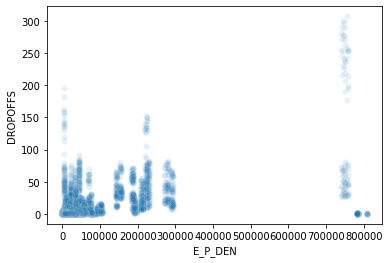

In [120]:
sns.scatterplot(y = df2['DROPOFFS'], x = df2['E_P_DEN'], alpha = 0.1)

In [ ]:
#df2 = df2[df2['ORIGIN'] != 17031030702]

In [ ]:
sns.scatterplot(y = df2['DROPOFFS'], x = df2['E_P_DEN'], hue = df2['TOD'])

In [ ]:
sns.regplot(y = df2['PICKUPS'], x = df2['E_P_DEN'])

In [ ]:
df2[df2['E_P_DEN'] > 750000].ORIGIN.unique()

In [ ]:
df2[df2['DESTINATION'] == 17031030702].PICKUPS.sum()

In [ ]:
len(df[df['DESTINATION'] == 17031030702])

In [ ]:
df2[df2['DESTINATION'] == 17031839100].PICKUPS.sum()

In [ ]:
len(df[df['DESTINATION'] == 17031839100])

In [ ]:
df2[(df2['E_P_DEN'] > 700000)&(df2['DROPOFFS'] <60)]

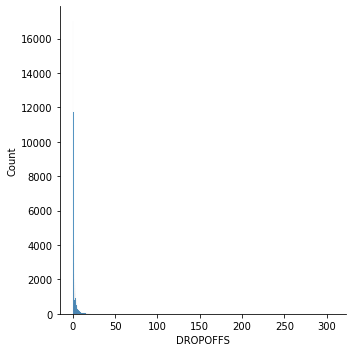

In [124]:
sns.displot(df2['DROPOFFS'])